# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
from os import path, listdir

import matplotlib.pyplot as plt
%matplotlib inline

# Directories

In [2]:
# Data directory
exoplanets_dir = path.expanduser("~/OneDrive/SEPHI_data/exoplanets/")
W20_pl_dir = "../CKS_crossmatch/planetdata_200806.csv"
W20_st_dir = path.expanduser("~/OneDrive/W20_data/")
st_header_len = 61

# The date that the exoplanets data (NASA EA) was downloaded:
data_date = "2022_04_28"

# Read the data

## Read the exoplanets database

In [3]:
exoplanets = pd.read_csv(path.join(exoplanets_dir, f"exoplanets_psd_" + data_date + f".csv"))

## Read the W20 data

In [4]:
W20_data = pd.read_csv( W20_pl_dir ) #this data is pre cuts
#print(W20_data)

# Renaming W20 columns

# This is how I removed the f at the start of the planet data columns:
W20_cols = list(W20_data.columns.values)
#print(W20_cols)
# the only 'f' s in the col names are at the start
#W20_cols[0] = "hostname" # was "hostnames"
#W20_cols_new = [i.replace("f", "") for i in W20_cols]
#print(W20_cols_new)

# The output:
W20_cols_new = ['hostname', 'pl_letter', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_age', 'st_ageerr1', 'st_ageerr2', 'st_met', 'st_meterr1', 'st_meterr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'Nss', 'Pnull', 'BIC1', 'rhoN', 'Phigh', 'HJflag', 'insamp', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_smax', 'pl_smaxerr1', 'pl_smaxerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_eccen', 'pl_eccenerr1', 'pl_eccenerr2', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2']
# insamp indicates whether the planet remains in the sample after cuts
# HJflag - are the Hot Jupiters around the star?
W20_cols_dict = {W20_cols[i]: W20_cols_new[i] for i in range(len(W20_cols))}
#print(W20_cols_dict)

# Renaming the columns:
W20_data.rename( columns=W20_cols_dict, inplace=True )
#print(W20_data.head())

# Reformatting the data

# Replace "-" entries with np.NaN
W20_data.replace(to_replace="-", value=np.nan, inplace=True)

# Changing the columns that should have numeric entries to numeric data types:
W20_numeric_cols = ['st_mass', 'st_masserr1', 'st_masserr2', 'st_age', 'st_ageerr1', 'st_ageerr2', 'st_met', 'st_meterr1', 'st_meterr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'Pnull', 'BIC1', 'rhoN', 'Phigh', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_smax', 'pl_smaxerr1', 'pl_smaxerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_eccen', 'pl_eccenerr1', 'pl_eccenerr2', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2']
W20_data[W20_numeric_cols] = W20_data[W20_numeric_cols].apply(pd.to_numeric)
#print(W20_data.dtypes)

# Separating the low and high phase-space densities

## For the exoplanets database

In [27]:
# Indicies of low and high phase-space density planets:
exo_low_index = np.where(exoplanets["class_6d"] == 0. )
exo_amb_index = np.where(exoplanets["class_6d"] == 1. )
exo_high_index = np.where(exoplanets["class_6d"] == 2.)
# TODO: where are the exoplanets where Pnull > 0.05?

print("No. of exoplanets df planets in low phase-space density:", exo_low_index[0].size)
print("No. of exoplanets df planets in ambiguous phase-space density:", exo_null_index[0].size)
print("No. of exoplanets df planets in high phase-space density:", exo_high_index[0].size)

No. of exoplanets df planets in low phase-space density: 431
No. of exoplanets df planets in ambiguous phase-space density: 365
No. of exoplanets df planets in high phase-space density: 843


## For the W20 data

In [19]:
# Indicies of low and high phase-space density planets:
W20_null_index = np.where(W20_data["Pnull"] > 0.05)
W20_low_index = np.where(W20_data["Phigh"] < 0.16)
W20_amb_index = np.where( (W20_data["Phigh"] > 0.16) & (W20_data["Phigh"] < 0.84) )
W20_high_index = np.where(W20_data["Phigh"] > 0.84)

print("No. of W20 planets with P_null > 0.05:", W20_null_index[0].size)
print("No. of W20 planets in low phase-space density:", W20_low_index[0].size)
print("No. of W20 planets in ambiguous phase-space density:", W20_amb_index[0].size)
print("No. of W20 planets in high phase-space density:", W20_high_index[0].size)

# The indicies of planets that remain in the W20 sample after cuts:
in_sample = np.where(W20_data["insamp"] == "Y" )

# Indicies of low and high phase-space density planets after cuts:
W20_null_index_cut = np.where(W20_data["Pnull"].iloc[in_sample] > 0.05) # TODO: Pnull > 0.05 (or equal to??). These planets should nopt be included in the final sample, they are cut
W20_low_index_cut = np.where(W20_data["Phigh"].iloc[in_sample] < 0.16)
W20_amb_index_cut = np.where( (W20_data["Phigh"].iloc[in_sample] > 0.16) & (W20_data["Phigh"].iloc[in_sample] < 0.84) )
W20_high_index_cut = np.where(W20_data["Phigh"].iloc[in_sample] > 0.84)

# TODO: how do these numbers look?

print("\nNo. of W20 planets included in their analysis:", in_sample[0].size)
print("No. of W20 planets with P_null > 0.05:", W20_null_index_cut[0].size)
print("No. of W20 planets in low phase-space density:", W20_low_index_cut[0].size)
print("No. of W20 planets in ambiguous phase-space density:", W20_amb_index_cut[0].size)
print("No. of W20 planets in high phase-space density:", W20_high_index_cut[0].size)

No. of W20 planets with P_null > 0.05: 32
No. of W20 planets in low phase-space density: 369
No. of W20 planets in ambiguous phase-space density: 391
No. of W20 planets in high phase-space density: 762

No. of W20 planets included in their analysis: 523
No. of W20 planets with P_null > 0.05: 0
No. of W20 planets in low phase-space density: 61
No. of W20 planets in ambiguous phase-space density: 144
No. of W20 planets in high phase-space density: 318


# Plots

## Planet mass vs semi major axis pre cuts

Text(0.5, 0.01, 'log(a_p [AU])')

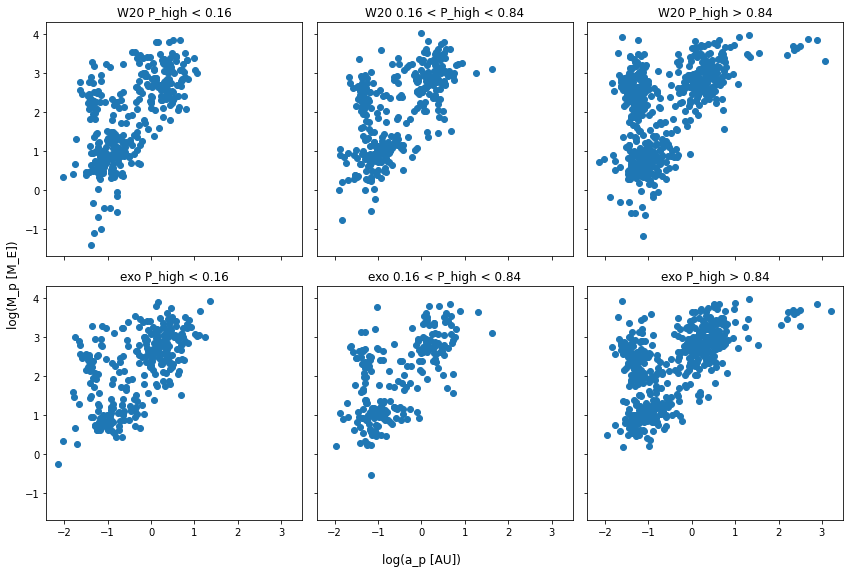

In [26]:
fig3, [[W20_ax_l, W20_ax_a, W20_ax_h], [exo_ax_l, exo_ax_a, exo_ax_h]] = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=[12,8], tight_layout=True)
# sharex makes them share the x-axis scale

W20_ax_l.set_title("W20 P_high < 0.16")
W20_ax_a.set_title("W20 0.16 < P_high < 0.84")
W20_ax_h.set_title("W20 P_high > 0.84")

exo_ax_l.set_title("exo P_high < 0.16")
exo_ax_a.set_title("exo 0.16 < P_high < 0.84")
exo_ax_h.set_title("exo P_high > 0.84")

W20_ax_l.scatter( np.log10(W20_data["pl_smax"].iloc[W20_low_index]), np.log10(W20_data["pl_bmasse"].iloc[W20_low_index]) )
W20_ax_a.scatter( np.log10(W20_data["pl_smax"].iloc[W20_amb_index]), np.log10(W20_data["pl_bmasse"].iloc[W20_amb_index]) )
W20_ax_h.scatter( np.log10(W20_data["pl_smax"].iloc[W20_high_index]), np.log10(W20_data["pl_bmasse"].iloc[W20_high_index]) )

exo_ax_l.scatter( np.log10(exoplanets["NEA_pl_sma"].iloc[exo_low_index]), np.log10(exoplanets["NEA_pl_bmasse"].iloc[exo_low_index]) )
exo_ax_a.scatter( np.log10(exoplanets["NEA_pl_sma"].iloc[exo_amb_index]), np.log10(exoplanets["NEA_pl_bmasse"].iloc[exo_amb_index]) )
exo_ax_h.scatter( np.log10(exoplanets["NEA_pl_sma"].iloc[exo_high_index]), np.log10(exoplanets["NEA_pl_bmasse"].iloc[exo_high_index]) )

fig3.supylabel('log(M_p [M_E])')
fig3.supxlabel('log(a_p [AU])')

# TODO: what happened to the planets at the bottom? did they get assigned Pnull?
# Find out what cuts I should be making
# Plot my results with the cuts

## Planet mass vs semi major axis post cuts

Text(0.5, 0.01, 'log(a_p [AU])')

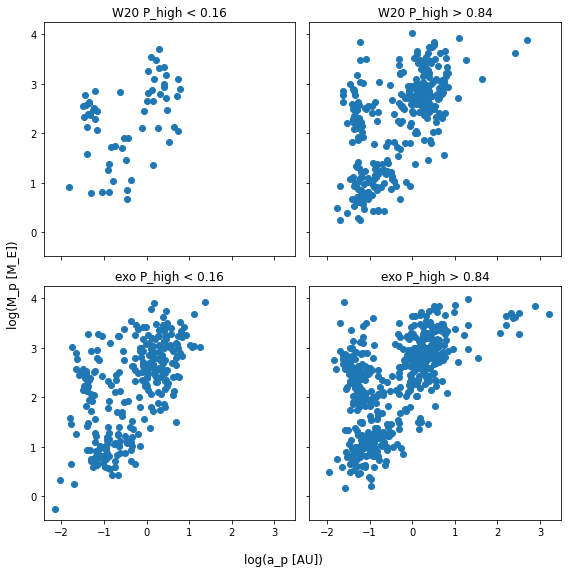

In [28]:
fig4, [[W20_ax_l, W20_ax_h], [exo_ax_l, exo_ax_h]] = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[8,8], tight_layout=True)
# sharex makes them share the x-axis scale

# TODO: apply cuts to exoplanets df
W20_ax_l.set_title("W20 P_high < 0.16") # post cuts
W20_ax_h.set_title("W20 P_high > 0.84") # post cuts
exo_ax_l.set_title("exo P_high < 0.16") # pre cuts
exo_ax_h.set_title("exo P_high > 0.84") # pre cuts

W20_ax_l.scatter( np.log10(W20_data["pl_smax"].iloc[W20_low_index_cut]), np.log10(W20_data["pl_bmasse"].iloc[W20_low_index_cut]) )
W20_ax_h.scatter( np.log10(W20_data["pl_smax"].iloc[W20_high_index_cut]), np.log10(W20_data["pl_bmasse"].iloc[W20_high_index_cut]) )

exo_ax_l.scatter( np.log10(exoplanets["NEA_pl_sma"].iloc[exo_low_index]), np.log10(exoplanets["NEA_pl_bmasse"].iloc[exo_low_index]) )
exo_ax_h.scatter( np.log10(exoplanets["NEA_pl_sma"].iloc[exo_high_index]), np.log10(exoplanets["NEA_pl_bmasse"].iloc[exo_high_index]) )

fig4.supylabel('log(M_p [M_E])')
fig4.supxlabel('log(a_p [AU])')

In [ ]:
# I do not need to read table1 :)))
# Ignore the below :)
#Read the W20_st data (table1)
#col_names_loc = 57
#data_start_loc = 61
#st_cols = ["hostname","st_mass", "st_masserr", "st_age", "st_ageerr", "no_neighbours", "log_Pnull", "BIC1-2", "log_betaM20", "log_Phigh", "HJ_host", "include", "Simbad_name", "RA", "DEC"] # M_solar, Gyr, deg
#W20_st_data = pd.read_csv( path.join(W20_st_dir, "table1.tsv"), sep=";", names=st_cols, skiprows=data_start_loc)
# This data is post cuts
#print(W20_st_data)

In [ ]:
#st_merge_cols = ["no_neighbours", "log_Pnull", "log_Phigh", "HJ_host", "include"] # "log_betaM20", "RA", "DEC"
# TODO: what is log_betaM20?
#W20 = pd.merge(W20_data, W20_st_data[st_merge_cols], on="hostname")

In [ ]:
#from astropy.io import ascii
#import astropy.units as u
#data = ascii.read(path.join(W20_st_dir, "table1.tsv"), delimiter=";", data_start=3)
#data["M*"].unit = u.M_sun
#data["e_M*"].unit = u.M_sun
#data["Tage"].unit = u.Gyr
#data["e_Tage"].unit = u.Gyr
#data["_RA"].unit = u.deg
#data["_DE"].unit = u.deg
#print(data)
#data.info